In [6]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import tensorflow as tf
from sklearn.metrics import classification_report
import os
import numpy as np
import pandas as pd

In [7]:
# Define the folder paths for the dataset
base_dir = 'E:/Godentist Dataset Capstone/Dataset Clear/tampak_atas'
folder_paths = {
    'Gigi Sehat': os.path.join(base_dir, 'Gigi Sehat'),
    'Plak Gigi': os.path.join(base_dir, 'Plak Gigi'),
    'Gigi Berlubang': os.path.join(base_dir, 'Gigi Berlubang'),
    'Bengkak Gusi': os.path.join(base_dir, 'Bengkak Gusi'),
    'Bukan Gambar Gigi': os.path.join(base_dir, 'Bukan Gambar Gigi')
}

In [8]:
# Create main dataset directory
base_dataset_dir = 'E:/Godentist Dataset Capstone/Dataset Clear'
os.makedirs(base_dataset_dir, exist_ok=True)

# Create subdirectories for training, validation, and test sets
train_dir = os.path.join(base_dataset_dir, 'train')
val_dir = os.path.join(base_dataset_dir, 'val')
test_dir = os.path.join(base_dataset_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [9]:
# Function to split data and copy images to train/val/test directories
def split_and_copy_images(folder_paths, train_dir, val_dir, test_dir, val_size=0.2, test_size=0.1):
    from sklearn.model_selection import train_test_split
    import shutil

    for label, folder_path in folder_paths.items():
        image_files = os.listdir(folder_path)
        train_files, temp_files = train_test_split(image_files, test_size=(val_size + test_size), random_state=42)
        val_files, test_files = train_test_split(temp_files, test_size=test_size/(val_size + test_size), random_state=42)

        # Create label directories in train, val, and test folders
        train_label_dir = os.path.join(train_dir, label)
        val_label_dir = os.path.join(val_dir, label)
        test_label_dir = os.path.join(test_dir, label)
        os.makedirs(train_label_dir, exist_ok=True)
        os.makedirs(val_label_dir, exist_ok=True)
        os.makedirs(test_label_dir, exist_ok=True)

        # Copy train images
        for image_file in train_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(train_label_dir, image_file))

        # Copy val images
        for image_file in val_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(val_label_dir, image_file))

        # Copy test images
        for image_file in test_files:
            shutil.copy2(os.path.join(folder_path, image_file), os.path.join(test_label_dir, image_file))

# Split data and create dataset
split_and_copy_images(folder_paths, train_dir, val_dir, test_dir)

print("Dataset split into training, validation, and test sets successfully!")

Dataset split into training, validation, and test sets successfully!


In [10]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 1924


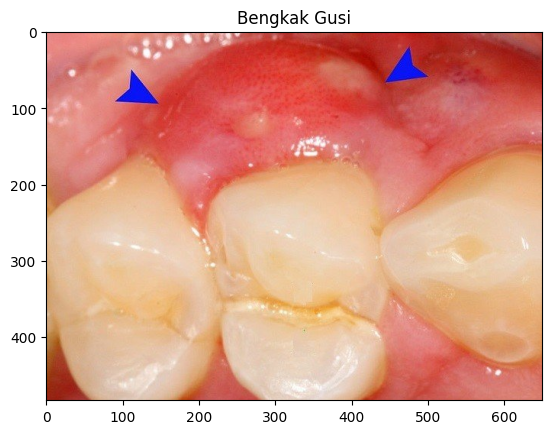

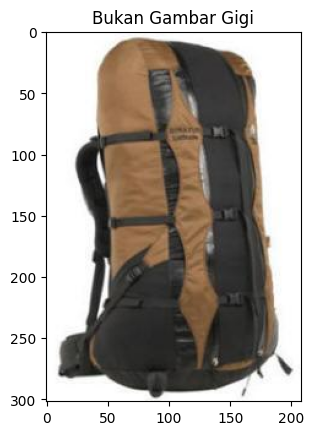

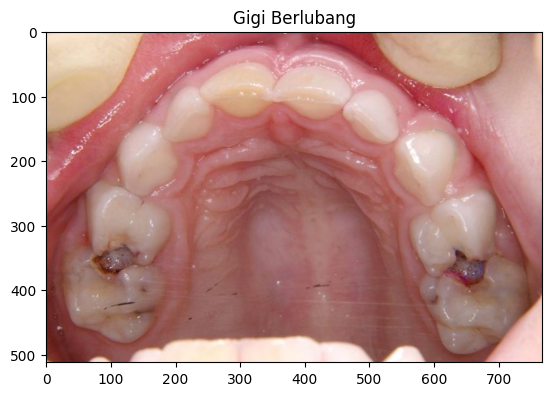

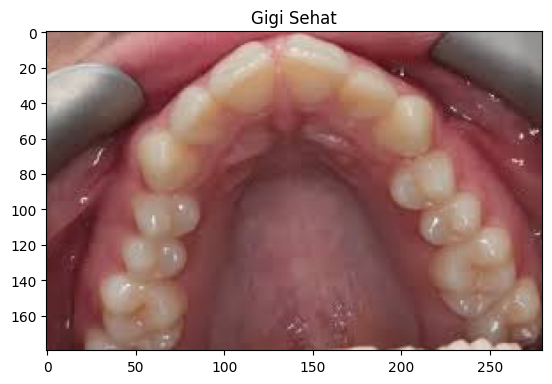

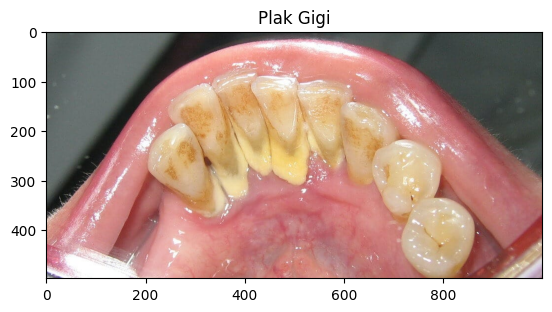

In [11]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.image as mpimg


img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

In [12]:
# import YOLO model
from ultralytics import YOLO

# Define YOLO model and train
model = YOLO('yolov8n-cls.pt')  # Specify the model version as needed

# Train the model
results = model.train(data=base_dataset_dir, epochs=50, imgsz=640,device='cpu')

New https://pypi.org/project/ultralytics/8.2.26 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.22  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=E:/Godentist Dataset Capstone/Dataset Clear, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

train: Scanning E:\Godentist Dataset Capstone\Dataset Clear\train... 1747 images, 0 corrupt: 100%|██████████| 1747/1747 [00:02<00:00, 642.62it/s]

train: WARNING  E:\Godentist Dataset Capstone\Dataset Clear\train\Plak Gigi\(173).jpg: corrupt JPEG restored and saved
train: WARNING  E:\Godentist Dataset Capstone\Dataset Clear\train\Plak Gigi\(254).jpg: corrupt JPEG restored and saved


train: New cache created: E:\Godentist Dataset Capstone\Dataset Clear\train.cache


val: Scanning E:\Godentist Dataset Capstone\Dataset Clear\val... 664 images, 0 corrupt: 100%|██████████| 664/664 [00:01<00:00, 638.39it/s]


val: New cache created: E:\Godentist Dataset Capstone\Dataset Clear\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\classify\train8
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.78s/it]

                   all      0.762          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.83s/it]

                   all      0.827          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.81s/it]

                   all       0.87          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:57<00:00,  2.74s/it]

                   all       0.89          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:02<00:00,  2.99s/it]

                   all      0.901          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.77s/it]

                   all      0.904          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.81s/it]

                   all      0.926          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.77s/it]

                   all      0.947          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.82s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50         0G     0.2048          3        640: 100%|██████████| 110/110 [07:00<00:00,  3.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.77s/it]

                   all      0.961          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50         0G     0.1985          3        640: 100%|██████████| 110/110 [07:03<00:00,  3.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.82s/it]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50         0G     0.2089          3        640: 100%|██████████| 110/110 [07:00<00:00,  3.82s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.78s/it]

                   all      0.965          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50         0G     0.1963          3        640: 100%|██████████| 110/110 [07:08<00:00,  3.90s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.84s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50         0G     0.1574          3        640: 100%|██████████| 110/110 [07:00<00:00,  3.82s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:57<00:00,  2.76s/it]

                   all      0.956          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50         0G     0.1464          3        640: 100%|██████████| 110/110 [07:07<00:00,  3.89s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.85s/it]

                   all       0.97          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50         0G      0.153          3        640: 100%|██████████| 110/110 [07:05<00:00,  3.87s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:57<00:00,  2.76s/it]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50         0G     0.1511          3        640: 100%|██████████| 110/110 [07:03<00:00,  3.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.83s/it]

                   all      0.968          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50         0G     0.1266          3        640: 100%|██████████| 110/110 [07:00<00:00,  3.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.77s/it]

                   all      0.971          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50         0G     0.1271          3        640: 100%|██████████| 110/110 [07:01<00:00,  3.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.83s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50         0G     0.1354          3        640: 100%|██████████| 110/110 [07:02<00:00,  3.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.78s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50         0G     0.1159          3        640: 100%|██████████| 110/110 [07:00<00:00,  3.82s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.83s/it]

                   all      0.967          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50         0G     0.0999          3        640: 100%|██████████| 110/110 [07:01<00:00,  3.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.76s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50         0G    0.09557          3        640: 100%|██████████| 110/110 [07:06<00:00,  3.88s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:00<00:00,  2.87s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50         0G    0.09702          3        640: 100%|██████████| 110/110 [07:04<00:00,  3.86s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.78s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50         0G     0.1044          3        640: 100%|██████████| 110/110 [07:01<00:00,  3.83s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.81s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50         0G    0.08679          3        640: 100%|██████████| 110/110 [07:04<00:00,  3.86s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:57<00:00,  2.75s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50         0G    0.08576          3        640: 100%|██████████| 110/110 [07:03<00:00,  3.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.84s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50         0G     0.0861          3        640: 100%|██████████| 110/110 [07:03<00:00,  3.85s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.79s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50         0G    0.08623          3        640: 100%|██████████| 110/110 [07:02<00:00,  3.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.81s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50         0G    0.07532          3        640: 100%|██████████| 110/110 [07:53<00:00,  4.30s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:07<00:00,  3.22s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50         0G    0.07301          3        640: 100%|██████████| 110/110 [08:29<00:00,  4.63s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:04<00:00,  3.06s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50         0G    0.06186          3        640: 100%|██████████| 110/110 [07:33<00:00,  4.12s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.81s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50         0G    0.06916          3        640: 100%|██████████| 110/110 [07:14<00:00,  3.95s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:18<00:00,  3.73s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50         0G      0.069          3        640: 100%|██████████| 110/110 [07:49<00:00,  4.27s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.78s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50         0G    0.05909          3        640: 100%|██████████| 110/110 [07:15<00:00,  3.96s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.85s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50         0G    0.05538          3        640: 100%|██████████| 110/110 [07:19<00:00,  4.00s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:05<00:00,  3.11s/it]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50         0G    0.05489          3        640: 100%|██████████| 110/110 [07:44<00:00,  4.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:06<00:00,  3.14s/it]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50         0G    0.05289          3        640: 100%|██████████| 110/110 [1:35:29<00:00, 52.09s/it]   
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:57<00:00,  2.74s/it]

                   all      0.973          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50         0G     0.0667          3        640: 100%|██████████| 110/110 [07:33<00:00,  4.13s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:16<00:00,  3.62s/it]

                   all       0.98          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50         0G    0.06211          3        640: 100%|██████████| 110/110 [11:42<00:00,  6.38s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:32<00:00,  4.41s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50         0G    0.04328          3        640: 100%|██████████| 110/110 [09:49<00:00,  5.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:24<00:00,  4.03s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50         0G     0.0552          3        640: 100%|██████████| 110/110 [10:08<00:00,  5.54s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:27<00:00,  4.15s/it]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50         0G    0.05024          3        640: 100%|██████████| 110/110 [08:46<00:00,  4.79s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:04<00:00,  3.08s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50         0G    0.05017          3        640: 100%|██████████| 110/110 [07:29<00:00,  4.08s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:01<00:00,  2.94s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50         0G    0.04091          3        640: 100%|██████████| 110/110 [07:26<00:00,  4.06s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:03<00:00,  3.04s/it]

                   all      0.976          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50         0G    0.03705          3        640: 100%|██████████| 110/110 [08:28<00:00,  4.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:25<00:00,  4.07s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50         0G    0.04144          3        640: 100%|██████████| 110/110 [08:49<00:00,  4.81s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:29<00:00,  4.24s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50         0G    0.03254          3        640: 100%|██████████| 110/110 [08:52<00:00,  4.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [01:01<00:00,  2.95s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50         0G    0.04393          3        640: 100%|██████████| 110/110 [07:14<00:00,  3.95s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:59<00:00,  2.85s/it]

                   all      0.977          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50         0G    0.05181          3        640: 100%|██████████| 110/110 [07:12<00:00,  3.93s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:58<00:00,  2.80s/it]

                   all      0.977          1



50 epochs completed in 8.638 hours.
Optimizer stripped from runs\classify\train8\weights\last.pt, 3.0MB
Optimizer stripped from runs\classify\train8\weights\best.pt, 3.0MB

Validating runs\classify\train8\weights\best.pt...
Ultralytics YOLOv8.2.22  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: E:\Godentist Dataset Capstone\Dataset Clear\train... found 1747 images in 5 classes  
val: E:\Godentist Dataset Capstone\Dataset Clear\val... found 664 images in 5 classes  
test: E:\Godentist Dataset Capstone\Dataset Clear\test... found 357 images in 5 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 21/21 [00:55<00:00,  2.64s/it]


                   all       0.98          1
Speed: 0.0ms preprocess, 58.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train8
Results saved to runs\classify\train8


In [13]:
# Plot training results
model.val()

Ultralytics YOLOv8.2.22  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
YOLOv8n-cls summary (fused): 73 layers, 1441285 parameters, 0 gradients, 3.3 GFLOPs
train: E:\Godentist Dataset Capstone\Dataset Clear\train... found 1747 images in 5 classes  
val: E:\Godentist Dataset Capstone\Dataset Clear\val... found 664 images in 5 classes  
test: E:\Godentist Dataset Capstone\Dataset Clear\test... found 357 images in 5 classes  


val: Scanning E:\Godentist Dataset Capstone\Dataset Clear\val... 664 images, 0 corrupt: 100%|██████████| 664/664 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 42/42 [01:45<00:00,  2.51s/it]


                   all       0.98          1
Speed: 0.0ms preprocess, 108.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\classify\train82


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002389D5B7130>
curves: []
curves_results: []
fitness: 0.9902108311653137
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9804216623306274, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9902108311653137}
save_dir: WindowsPath('runs/classify/train82')
speed: {'preprocess': 0.0, 'inference': 108.44970970268709, 'loss': 0.0, 'postprocess': 0.0}
task: 'classify'
top1: 0.9804216623306274
top5: 1.0

In [16]:
results = model("E:/Godentist Dataset Capstone/Dataset Clear/coba/WhatsApp Image 2024-05-31 at 10.52.03 AM.jpeg")  # predict on an image


image 1/1 E:\Godentist Dataset Capstone\Dataset Clear\coba\WhatsApp Image 2024-05-31 at 10.52.03 AM.jpeg: 640x640 Bukan Gambar Gigi 0.99, Bengkak Gusi 0.01, Plak Gigi 0.00, Gigi Berlubang 0.00, Gigi Sehat 0.00, 80.5ms
Speed: 70.0ms preprocess, 80.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [14]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.2.22  Python-3.10.6 torch-2.3.0+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)

PyTorch: starting from 'runs\classify\train8\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5) (2.8 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  0.9s, saved as 'runs\classify\train8\weights\best.onnx' (5.5 MB)

Export complete (4.1s)
Results saved to D:\R\Phyton\Bangkit Capstone\runs\classify\train8\weights
Predict:         yolo predict task=classify model=runs\classify\train8\weights\best.onnx imgsz=640  
Validate:        yolo val task=classify model=runs\classify\train8\weights\best.onnx imgsz=640 data=E:/Godentist Dataset Capstone/Dataset Clear  
Visualize:       https://netron.app


In [15]:
path

'runs\\classify\\train8\\weights\\best.onnx'

# Predict

## Folder

C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_5044\521422793.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output_class = class_names[int(class_ids)]


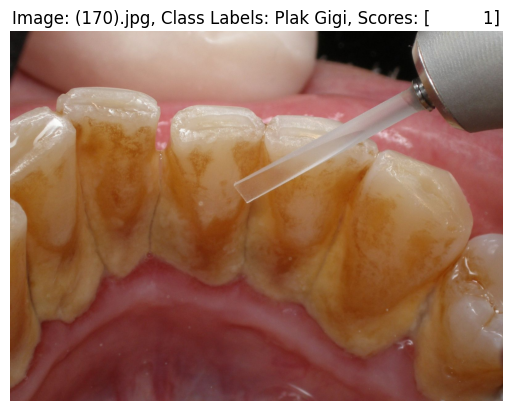

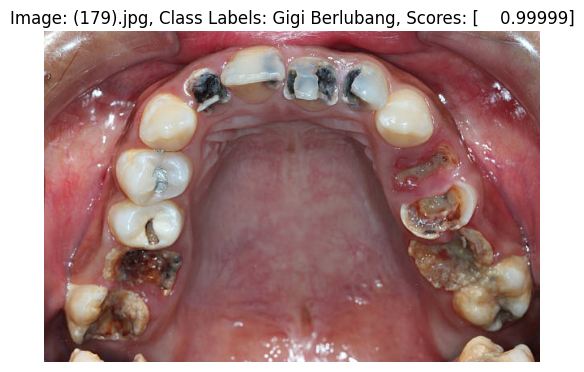

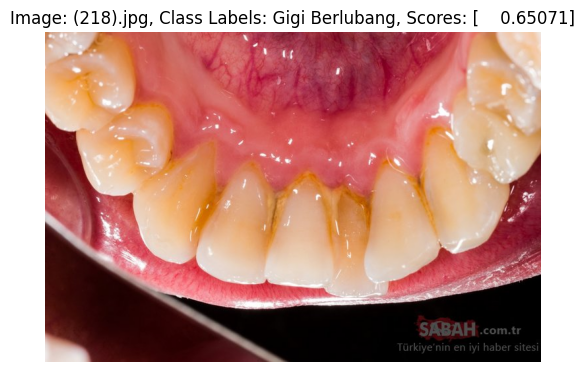

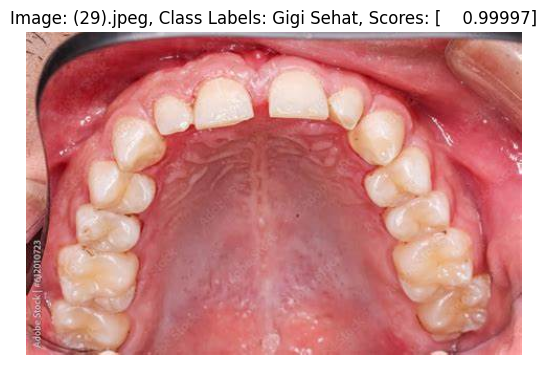

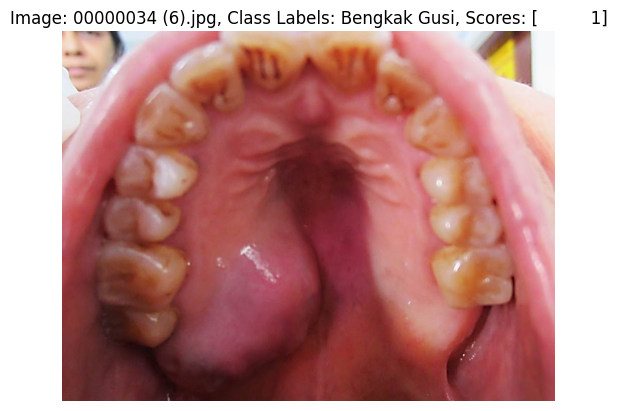

In [45]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import os

# Load the ONNX model
ort_session = ort.InferenceSession('D:/R/Phyton/Bangkit Capstone/runs/classify/train7/weights/best.onnx')

# Load class names from file
def load_class_names(class_file):
    with open(class_file, 'r') as f:
        class_names = f.read().strip().split('\n')
    return class_names

class_names = load_class_names('D:/R/Phyton/Bangkit Capstone/classes.txt')

# Define image preprocessing function
def preprocess_image(img_path, input_size=(640, 640)):
    img = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
    ])
    img = transform(img).unsqueeze(0).numpy()
    return img

# Define prediction function
def predict(img):
    outputs = ort_session.run(None, {ort_session.get_inputs()[0].name: img})
    return outputs

# Directory containing images
image_folder = 'E:/Godentist Dataset Capstone/Dataset Clear/coba'

# Process each image in the folder
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    if os.path.isfile(img_path) and img_path.endswith(('.jpg', '.jpeg', '.png')):
        img = preprocess_image(img_path)
        outputs = predict(img)
        
        # Process the outputs to get class labels and probabilities
        for output in outputs:
            # Assuming the output contains class scores or probabilities
            class_ids = np.argmax(output, axis=1)
            output_class = class_names[int(class_ids)]
            class_scores = np.max(output, axis=1)

            # Load and display the image
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f'Image: {img_name}, Class Labels: {output_class}, Scores: {class_scores}')
            plt.axis('off')
            plt.show()

## Gambar

Predicted class: Bengkak Gusi
Prediction time: 0.04600167274475098 seconds


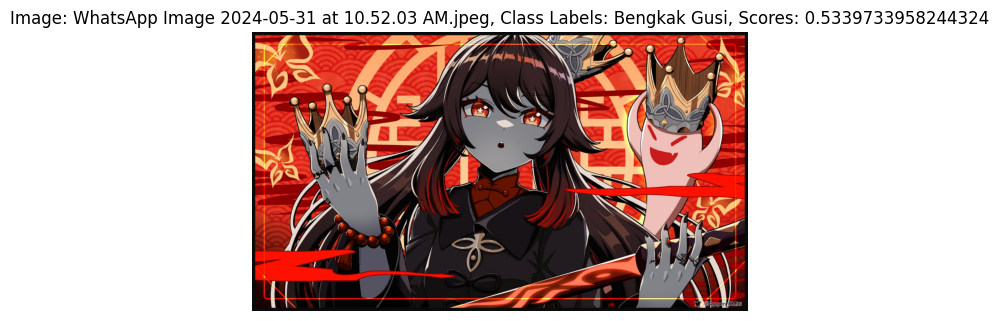

In [5]:
import onnxruntime as ort
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import time

# Load the ONNX model
ort_session = ort.InferenceSession('D:/R/Phyton/Bangkit Capstone/runs/classify/train7/weights/best.onnx')

# Load class names from file
def load_class_names(class_file):
    with open(class_file, 'r') as f:
        class_names = f.read().strip().split('\n')
    return class_names

class_names = load_class_names('D:/R/Phyton/Bangkit Capstone/classes.txt')

# Load image and preprocess
img_path = 'E:/Godentist Dataset Capstone/Dataset Clear/coba/WhatsApp Image 2024-05-31 at 10.52.03 AM.jpeg'
img = Image.open(img_path).convert('RGB')
transform = transforms.Compose([transforms.Resize((640, 640)), transforms.ToTensor()])
img = transform(img)  # Convert image to tensor
img = np.array(img)    # Convert tensor to numpy array
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Perform inference
start_time = time.time()
outputs = ort_session.run(None, {ort_session.get_inputs()[0].name: img})
end_time = time.time()
prediction_time = end_time - start_time

# Process the results
output_indices = np.argmax(outputs[0][0], axis=0)
output_class = class_names[int(output_indices)]
class_scores = np.max(outputs[0][0], axis=0)

# Extract the image name from the path
img_name = img_path.split('/')[-1]

# Print output
print("Predicted class:", output_class)
print("Prediction time:", prediction_time, "seconds")

img = Image.open(img_path)
plt.imshow(img)
plt.title(f'Image: {img_name}, Class Labels: {output_class}, Scores: {class_scores}')
plt.axis('off')
plt.show()